In [60]:
import pandas as pd
import matplotlib.pyplot as plt  # plotting and visualization
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot
import seaborn as sns
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rmora\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rmora\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv("cleaned_dataset.csv")

In [3]:
df.head()

,Date,user,text,Hashtags,Mentions,pp_text,sentiment_score,sentiment_category
0,2009-04-06,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",[],['switchfoot'],thats bummer shoulda got david carr third day,0.000,neutral
1,2009-04-06,scotthamilton,is upset that he can't update his Facebook by ...,[],[],upset cant update facebook texting might cry r...,0.000,neutral
2,2009-04-06,mattycus,@Kenichan I dived many times for the ball. Man...,[],['Kenichan'],dived many time ball managed save rest bound,0.500,positive
3,2009-04-06,ElleCTF,my whole body feels itchy and like its on fire,[],[],whole body feel itchy like fire,0.200,positive
4,2009-04-06,Karoli,"@nationwideclass no, it's not behaving at all....",[],['nationwideclass'],behaving mad cant see,-0.625,negative


In [4]:
# Convert 'Date' to datetime and sort it
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)

In [7]:
# Function to preprocess and tokenize text
def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text)
    # Convert to lower case
    tokens = [w.lower() for w in tokens]
    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # Remove non-alphabetic tokens and stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in stripped if word.isalpha() and word not in stop_words]
    return words

# Preprocess text for the entire DataFrame
df['processed_text'] = df['text'].apply(preprocess_text)

In [5]:
df.head()

,Date,user,text,Hashtags,Mentions,pp_text,sentiment_score,sentiment_category
0,2009-04-06,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",[],['switchfoot'],thats bummer shoulda got david carr third day,0.0,neutral
796595,2009-04-06,PrudenceAnn,"ready for nice weather, day drinking &amp; not...",[],[],ready nice weather day drinking amp ever student,0.4,positive
796596,2009-04-06,shaketramp,"@nick_carter you are my IDOL, i love you! you...",[],['nick_carter'],idol love reply lt3,0.5,positive
796597,2009-04-06,Thomas_h_p,"Holy he'll, just had an epic Aporto burger wit...",[],[],holy hell epic aporto burger epic amount chill...,0.1,positive
796598,2009-04-06,emdanyell,Going mimis with thoughts of Shick and Gavin D...,[],[],going mimis thought shick gavin degraw song da...,0.0,neutral


In [6]:
df['Date'].unique()

array(['2009-04-06T00:00:00.000000000', '2009-04-07T00:00:00.000000000',
       '2009-04-17T00:00:00.000000000', '2009-04-18T00:00:00.000000000',
       '2009-04-19T00:00:00.000000000', '2009-04-20T00:00:00.000000000',
       '2009-04-21T00:00:00.000000000', '2009-05-01T00:00:00.000000000',
       '2009-05-02T00:00:00.000000000', '2009-05-03T00:00:00.000000000',
       '2009-05-04T00:00:00.000000000', '2009-05-09T00:00:00.000000000',
       '2009-05-10T00:00:00.000000000', '2009-05-11T00:00:00.000000000',
       '2009-05-13T00:00:00.000000000', '2009-05-14T00:00:00.000000000',
       '2009-05-16T00:00:00.000000000', '2009-05-17T00:00:00.000000000',
       '2009-05-18T00:00:00.000000000', '2009-05-21T00:00:00.000000000',
       '2009-05-22T00:00:00.000000000', '2009-05-23T00:00:00.000000000',
       '2009-05-25T00:00:00.000000000', '2009-05-26T00:00:00.000000000',
       '2009-05-27T00:00:00.000000000', '2009-05-28T00:00:00.000000000',
       '2009-05-29T00:00:00.000000000', '2009-05-30

In [81]:
specific_date = '2009-06-01'
mask = df['Date'] == pd.to_datetime(specific_date)
filtered_df = df[mask]
filtered_df.head()

,Date,user,text,Hashtags,Mentions,pp_text,sentiment_score,sentiment_category
294403,2009-06-01,MJBx,ugh so sick yet again,[],[],ugh sick yet,-0.714286,negative
294404,2009-06-01,TyJennings,Has a nasty head cold.,[],[],nasty head cold,-0.800000,negative
294405,2009-06-01,tnnkotbgirl,going to workout!! Left my ipod at work,[],[],going workout left ipod work,0.000000,neutral
294406,2009-06-01,xxCP,it's been 4 days since be last updated! is he ...,[],[],day since last updated still alive xxx,0.050000,positive
294407,2009-06-01,ACRead,I'm getting a headache.,[],[],getting headache,0.000000,neutral


In [106]:
specific_date = '2009-06-24'
mask = df['Date'] == pd.to_datetime(specific_date)
filtered_df = df[mask]
# Explode Hashtags column and get top 10 hashtags
top_hashtags = filtered_df['Hashtags'].explode().value_counts().head(10)
print('Top 10 Hashtags:')
print(top_hashtags)

Top 10 Hashtags:
[]                      6180
['BSB']                    9
['fb']                     5
['IranElection']           3
['2']                      2
['nmd']                    1
['Portland']               1
['infsum']                 1
['carelessmistakeI']       1
['squarespace']            1
Name: Hashtags, dtype: int64


In [107]:
# Step 1: Concatenate all the tweets into a single string
all_tweets = ' '.join(filtered_df['pp_text'])

# Step 2: Tokenize the string into words
# Remove punctuation and numbers, and split into words
words = re.findall(r'\b\w+\b', all_tweets.lower())

# Step 3: Count the frequency of each word
word_counts = Counter(words)

# Step 4: Identify the most common word
most_common_word = word_counts.most_common(10)
most_common_word

[('cant', 389),
 ('dont', 380),
 ('get', 379),
 ('miss', 359),
 ('like', 331),
 ('day', 327),
 ('want', 287),
 ('really', 282),
 ('work', 269),
 ('going', 267)]

In [ ]:
# Create a list to store each day's trends
trends_data = []

# Aggregate information by date
for date, group in df.groupby(df['Date'].dt.date):
    # Get the most common hashtag
    all_hashtags = sum(group['Hashtags'].dropna().apply(lambda x: x.split()).tolist(), [])
    common_hashtag = Counter(all_hashtags).most_common(1)
    popular_hashtag = common_hashtag[0][0] if common_hashtag else None

    # Get the most common word
    all_words = sum(group['processed_text'].tolist(), [])
    common_word = Counter(all_words).most_common(1)
    popular_word = common_word[0][0] if common_word else None

    # Calculate mean sentiment score
    mean_score = group['sentiment_score'].mean()

    # Count the number of tweets
    tweet_count = group.shape[0]

    # Append to the list
    trends_data.append({
        'Date': date,
        'Hashtag': popular_hashtag,
        'Popular_Word': popular_word,
        'Mean_Score': mean_score,
        'Count': tweet_count
    })

In [ ]:
# Create a DataFrame from the list
trends_df = pd.DataFrame(trends_data)

# Display the DataFrame
print(trends_df.head())

In [4]:
df = df[["Date","sentiment_score"]]
df.head()

,Date,sentiment_score
0,2009-04-06,0.000
1,2009-04-06,0.000
2,2009-04-06,0.500
3,2009-04-06,0.200
4,2009-04-06,-0.625


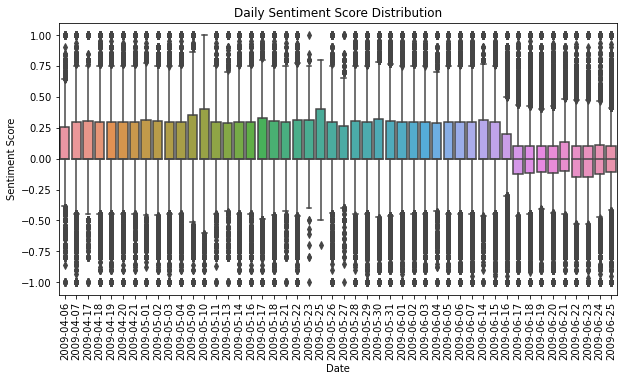

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x=df.index.date, y='sentiment_score')
plt.xticks(rotation=90)  # Rotate the x labels if there are many dates
plt.title('Daily Sentiment Score Distribution')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.show()

In [14]:
# Assuming `df` is your DataFrame with the 'sentiment_score' column
Q1 = df['sentiment_score'].quantile(0.25)
Q3 = df['sentiment_score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Select outliers
outliers_df = df2[(df2['sentiment_score'] < lower_bound) | (df2['sentiment_score'] > upper_bound)]

In [16]:
outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222767 entries, 4 to 1588123
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                222767 non-null  object 
 1   user                222767 non-null  object 
 2   text                222767 non-null  object 
 3   Hashtags            222767 non-null  object 
 4   Mentions            222767 non-null  object 
 5   pp_text             222767 non-null  object 
 6   sentiment_score     222767 non-null  float64
 7   sentiment_category  222767 non-null  object 
dtypes: float64(1), object(7)
memory usage: 15.3+ MB


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1588124 entries, 0 to 1588123
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Date                1588124 non-null  object 
 1   user                1588124 non-null  object 
 2   text                1588124 non-null  object 
 3   Hashtags            1588124 non-null  object 
 4   Mentions            1588124 non-null  object 
 5   pp_text             1588124 non-null  object 
 6   sentiment_score     1588124 non-null  float64
 7   sentiment_category  1588124 non-null  object 
dtypes: float64(1), object(7)
memory usage: 96.9+ MB


In [22]:
df2['Date'] = pd.to_datetime(df2['Date'])

# Group by date and aggregate the hashtags
trends_daily = df2.groupby('Date')['Hashtags'].agg(lambda x: ' '.join(x.dropna())).str.split().value_counts()

In [23]:
trends_daily

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['itm'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ...]                                                              1
[[], [], [], [], [], [], [], [], [], [], [], ['24',, 'the'], [], [], [], [], [], [], ['twitter',, 'fail'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ...]                                             1
[[], [], [], [], [], [], [], [], [], [], [], [], [],